## <span style="color:GoldenRod ">**Retail Sales Analysis**</span>

In [1]:
# import the pandas library
import pandas as pd

# import zipfile library (we will use this to extract the file downloaded from Kaggle)
import zipfile

# import kaggle library (we will use this to download dataset from kaggle)
import kaggle

In [2]:
# Download the dataset from kaggle using the Kaggle API
!kaggle datasets download -d mohammadtalib786/retail-sales-dataset


  0%|          | 0.00/11.2k [00:00<?, ?B/s]
100%|██████████| 11.2k/11.2k [00:00<00:00, 2.44MB/s]


In [4]:
# extract the file from the downloaded zip file
zipfilename = 'retail-sales-dataset.zip'
with zipfile.ZipFile(zipfilename, 'r') as f:
    f.extractall()

In [6]:
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### **Data Cleaning**

In [12]:
# Inspecting the Data
df.head()

df.info()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,1000,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,CUST001,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,1,510,NaN,351,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,1.000000,NaN,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,250.750000,NaN,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,500.500000,NaN,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,750.250000,NaN,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [18]:
# Handling the Missing Values
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [16]:
# Check for Duplicates
df.duplicated().sum()

0

In [17]:
# Converting objects to appropriate Data Types 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [20]:
# Convert Date to  datetime
df['Date'] = pd.to_datetime(df['Date'])

#Convert Gender & Product Category to category
df[['Gender', 'Product Category']] = df[['Gender', 'Product Category']].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   category      
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   category      
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: category(2), datetime64[ns](1), int64(5), object(1)
memory usage: 57.0+ KB


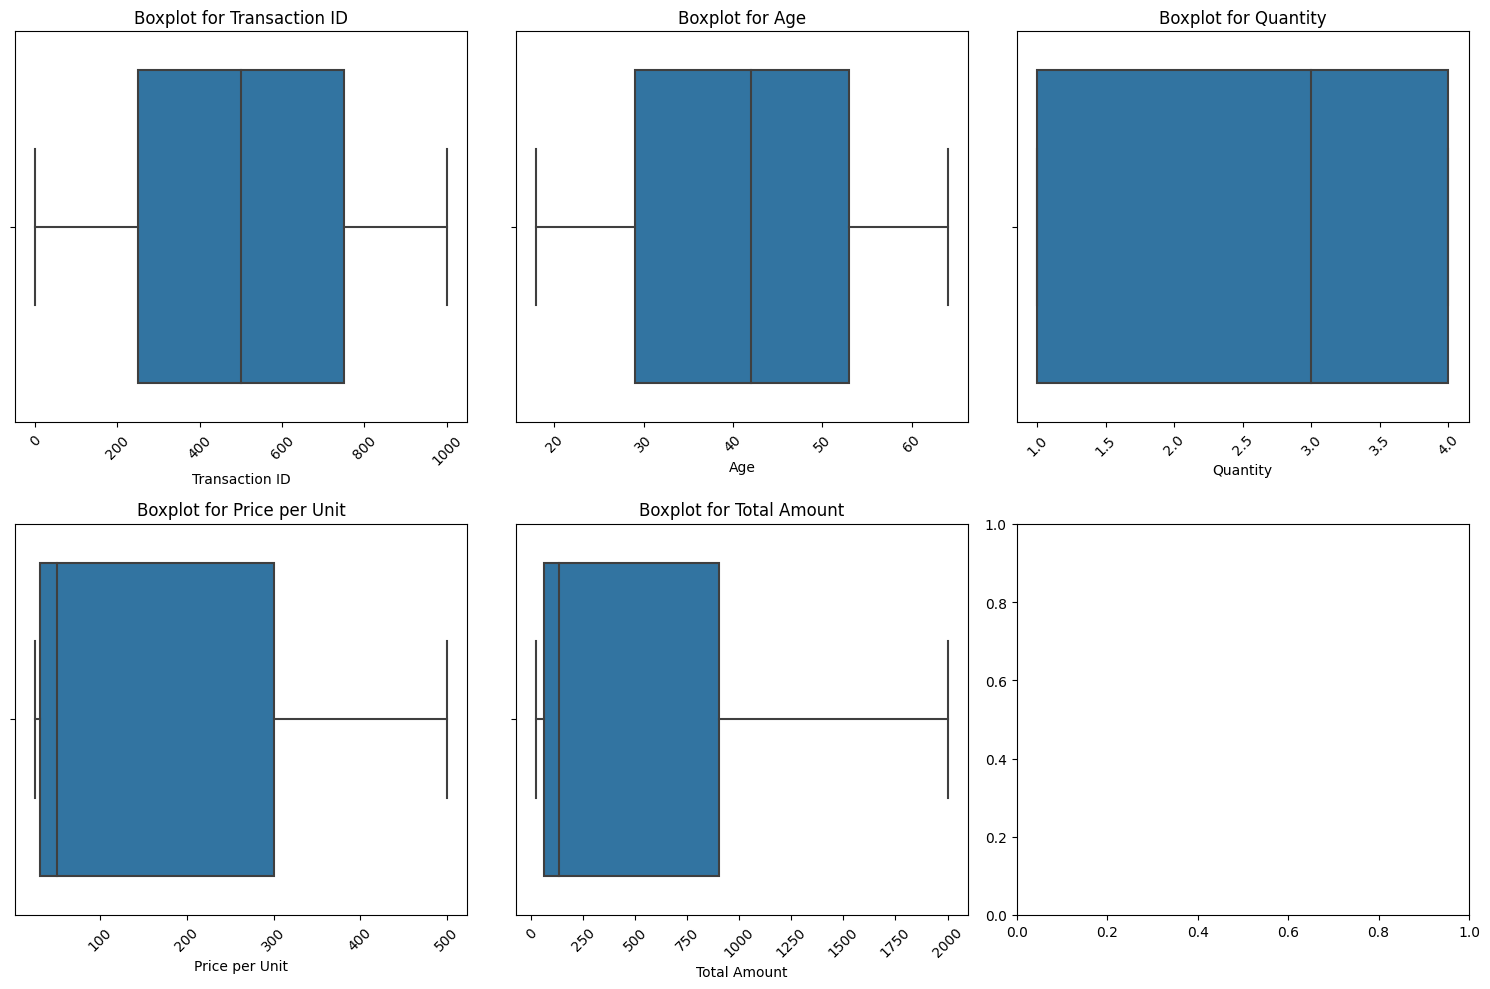

In [ ]:
# Visualize Potential Outliers with Boxplots

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=len(numeric_cols)//3+1, ncols=3, figsize=(15, 5*(len(numeric_cols)//3+1)))

# Flatten the axes array for easy iteration
axes = axes.flatten()   # the axes.flatten() makes it easier to loop through each subplot and place the boxplot on it.

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  #optional 

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [28]:
# Statistical Methods for Outlier Detection: IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

# Detecting Outliers
outliers = df[(df[numeric_cols] < lower_limit) | (df[numeric_cols] > upper_limit)]
outliers.head(3)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Standardize Text Columns: Trimming leading/trailing spaces, Converting cases and hadling misspellings 
# df['Customer ID'].unique  all unique Id's as there is no duplicate value

df['Gender'].unique

<bound method Series.unique of 0        Male
1      Female
2        Male
3        Male
4        Male
        ...  
995      Male
996      Male
997    Female
998    Female
999      Male
Name: Gender, Length: 1000, dtype: category
Categories (2, object): ['Female', 'Male']>

In [33]:
df['Product Category'].unique

<bound method Series.unique of 0           Beauty
1         Clothing
2      Electronics
3         Clothing
4           Beauty
          ...     
995       Clothing
996         Beauty
997         Beauty
998    Electronics
999    Electronics
Name: Product Category, Length: 1000, dtype: category
Categories (3, object): ['Beauty', 'Clothing', 'Electronics']>

In [47]:
df['Product Category'].str.strip()      #No leading or trailing spaces here

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### **Exploratory Data Analysis**

In [ ]:
# Summary Statistics
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


### **Basic KPIs** 
Total Revenue, Transactions, Unique Customers

In [51]:
# Total Revenue
total_revenue = df['Total Amount'].sum()

# Unique Customers
unique_customers = df['Customer ID'].nunique()

print(f"Total Revenue: {total_revenue}")
print(f"Unique Customers: {unique_customers}")

Total Revenue: 456000
Unique Customers: 1000


### **Revenue Analysis**
Revenue by Product Category

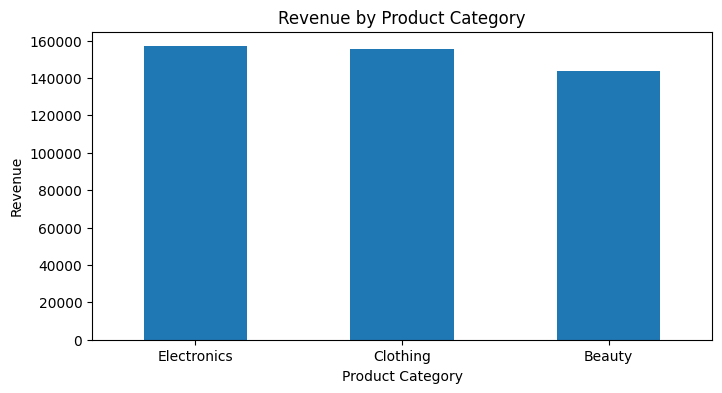

In [66]:
# Group by Product Category 
category_revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Visulaization
import matplotlib.pyplot as plt
category_revenue.plot(kind='bar', title='Revenue by Product Category', figsize=(8,4))
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()